In [129]:
import pandas as pd 
from pathlib import Path
import sys


# Import scientific librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from prophet import Prophet

# Add project directory to kernel paths
sys.path.append('../../')


print("We're running localy")

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 54.2 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [47 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib
      creating build/lib/fbprophet
      creating build/lib/fbprophet/stan_model
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-9fagyhob/fbprophet_f4d2a26248494c77be28f731b57a707c/setup.py", line 122, in <module>
          setup(
        File "/usr/lib/python3/dist-packages/setuptools/__init__.py", line 153, in setup
          r

In [120]:
from src.data.file_manager import FileManager
weatherManager = FileManager()
color_pal = sns.color_palette()

*Format data for prophet model using ds and y*

In [121]:
raw_dir_path = weatherManager.data_dir / 'raw'

raw_path = str(raw_dir_path / 'full_data.csv')
df_final = pd.read_csv(raw_path)
# df_final.set_index("Years" , inplace=True)

#on rename index par Year
df_final = df_final.rename(columns={'Years': 'ds'})
df_final = df_final.rename(columns={'AverageTemperature': 'y'})
df_final


,ds,y
0,2000-01-01,11.738083
1,2001-01-01,11.361583
2,2002-01-01,11.767500
3,2003-01-01,12.076917
4,2004-01-01,11.266333
5,2005-01-01,11.229083
6,2006-01-01,11.871250
7,2007-01-01,11.571833
8,2008-01-01,11.200750
9,2009-01-01,11.607500


In [122]:
# Python
m = Prophet()
m.fit(df_final)

10:59:11 - cmdstanpy - INFO - Chain [1] start processing
10:59:11 - cmdstanpy - INFO - Chain [1] done processing


In [123]:
future = m.make_future_dataframe(periods=2)
future

,ds
0,2000-01-01
1,2001-01-01
2,2002-01-01
3,2003-01-01
4,2004-01-01
5,2005-01-01
6,2006-01-01
7,2007-01-01
8,2008-01-01
9,2009-01-01


In [124]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2000-01-01,11.149060,10.382997,11.815942
1,2001-01-01,11.116861,10.367282,11.798882
2,2002-01-01,11.484957,10.750794,12.214445
3,2003-01-01,11.593592,10.878442,12.355186
4,2004-01-01,11.442717,10.701255,12.144841
5,2005-01-01,11.410518,10.637902,12.161500
6,2006-01-01,11.778620,10.977227,12.538012
7,2007-01-01,11.887286,11.182277,12.646884
8,2008-01-01,11.736518,11.031413,12.513617
9,2009-01-01,11.704972,11.022324,12.466451


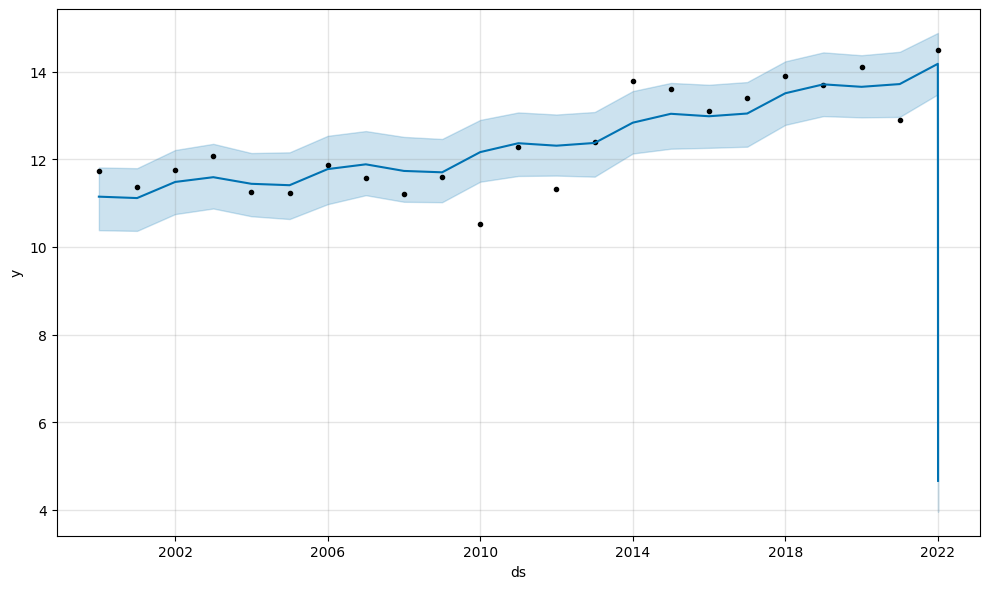

In [125]:
# Python
fig1 = m.plot(forecast)

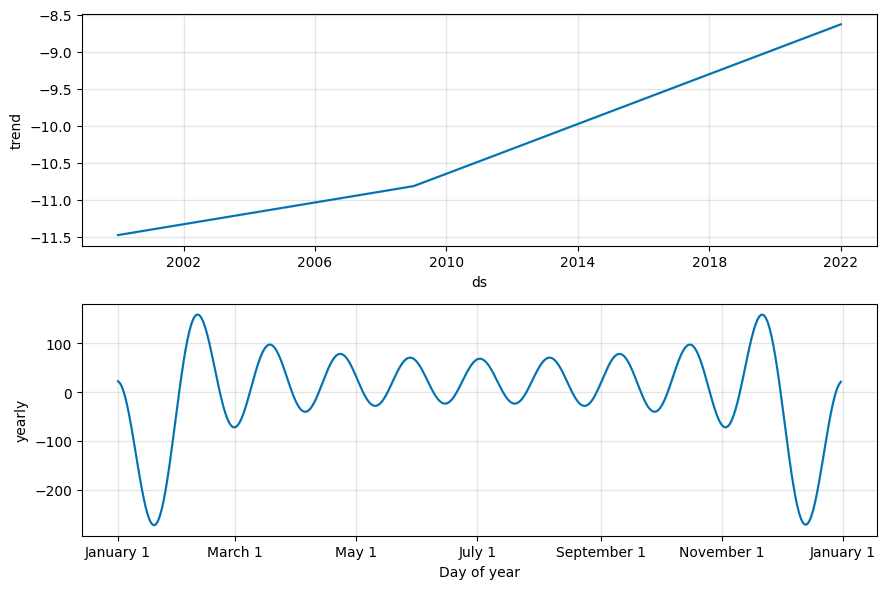

In [130]:
# Python
fig2 = m.plot_components(forecast)

In [131]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [135]:
# Convert the column to the datetime format
df_final['ds'] = pd.to_datetime(df_final['ds'])

# Split the data into train and test based on the date
train = df_final.loc[df_final['ds'] < '2017-01-01']
test = df_final.loc[df_final['ds'] >= '2017-01-01']

In [ ]:
train.reset_index()
train

index
2000   2000-01-01
2001   2001-01-01
2002   2002-01-01
2003   2003-01-01
2004   2004-01-01
2005   2005-01-01
2006   2006-01-01
2007   2007-01-01
2008   2008-01-01
2009   2009-01-01
2010   2010-01-01
2011   2011-01-01
2012   2012-01-01
2013   2013-01-01
2014   2014-01-01
2015   2015-01-01
2016   2016-01-01
Name: ds, dtype: datetime64[ns]